In [1]:
import random
from copy import deepcopy

import cv2
import matplotlib.pyplot as plt

import albumentations as A
from albumentations.augmentations.transforms import RandomBrightnessContrast, Sharpen
from albumentations.augmentations.blur.transforms import GaussianBlur

transform = A.Compose(
    [
        # A.RandomCrop(width=240, height=320, p=0.5),
        A.Rotate(limit=40, p=0.5),
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        RandomBrightnessContrast(p=0.5),
        A.OneOf(
            [
                GaussianBlur(p=0.5),
                Sharpen(p=0.5),
            ], p=0.7)
    ]
)

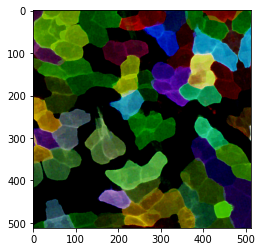

In [33]:
random.seed(2022) # To get consistent augmentations ( 'albumentations' package )


img_path = r"C:\Users\confocal_microscope\Desktop\{Test}_DataSet\{20230305_NEW_STRUCT}_Academia_Sinica_i409\fish_dataset_horiz_cut_1l2_Mix_AP\DS_SURF3C_CRPS512_SF14_INT20_DRP100_RS2022\train\selected\L\L_fish_9_A_aug_0NTz2m7j.tiff"

img = cv2.imread(img_path) # BGR
img2 = deepcopy(img)
hsv_full = deepcopy(img)


img = img[:,:,::-1] # BGR -> RGB
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB) # BGR -> RGB
assert (img == img2).all(), "img != img2"

# Get 'V' channel
brightness = cv2.cvtColor(hsv_full, cv2.COLOR_BGR2HSV_FULL)[:,:,2]

# Do transform
transformed = transform(image=img2)
img2 = transformed["image"]


# plt.imshow(brightness, cmap='gray', vmin=0, vmax=255) # condition_1
plt.imshow(img2, vmin=0, vmax=255) # condition_2